In [16]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix

%matplotlib inline

In [3]:
%run 101-data_preprocessing.py

In [4]:
# load the model from disk
modelXGB_001 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.01.pickle.dat'), 'rb'))
modelXGB_002 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.02.pickle.dat'), 'rb'))
modelXGB_003 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.03.pickle.dat'), 'rb'))
modelXGB_004 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.04.pickle.dat'), 'rb'))
modelXGB_005 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.05.pickle.dat'), 'rb'))
modelXGB_006 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.06.pickle.dat'), 'rb'))
modelXGB_007 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.07.pickle.dat'), 'rb'))
modelXGB_008 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.08.pickle.dat'), 'rb'))
modelXGB_009 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.09.pickle.dat'), 'rb'))
modelXGB_01 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.1.pickle.dat'), 'rb'))
modelXGB_02 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.2.pickle.dat'), 'rb'))
modelXGB_03 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.3.pickle.dat'), 'rb'))
modelXGB_04 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.4.pickle.dat'), 'rb'))
modelXGB_05 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.5.pickle.dat'), 'rb'))
modelXGB_06 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.6.pickle.dat'), 'rb'))
modelXGB_07 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.7.pickle.dat'), 'rb'))
modelXGB_08 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.8.pickle.dat'), 'rb'))
modelXGB_09 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-0.9.pickle.dat'), 'rb'))
modelXGB_1 = pickle.load(open(os.path.join(path_y_t1, 't1-xgboostModel-1.0.pickle.dat'), 'rb'))

In [5]:
modelXGB_list = [modelXGB_001, modelXGB_002, modelXGB_003, modelXGB_004, modelXGB_005, 
                 modelXGB_006, modelXGB_007, modelXGB_008, modelXGB_009,
                 modelXGB_01, modelXGB_02, modelXGB_03, modelXGB_04, modelXGB_05, 
                 modelXGB_06, modelXGB_07, modelXGB_08, modelXGB_09, modelXGB_1]
learning_rate_list = [0.01, 0.02, 0.03, 0.04, 0.05, 
                      0.06, 0.07, 0.08, 0.09, 
                      0.1, 0.2, 0.3, 0.4, 0.5, 
                      0.6, 0.7, 0.8, 0.9, 1.0]
accuracy_list = []
precision_list = []
auc_list = []

In [6]:
for modelXGB in modelXGB_list:
    y_pred = modelXGB.predict(X_valid)
    # compute the accuracy score
    accuracy_list.append(accuracy_score(y_valid_t1, y_pred))
    # compute the precision score
    precision_list.append(precision_score(y_valid_t1, y_pred))

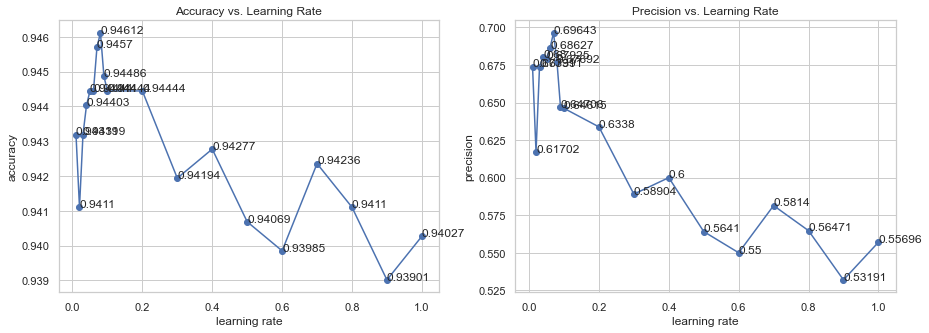

In [7]:
# plot the graph of accuracy and precision with two different subplots
sns.set_theme(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(learning_rate_list, accuracy_list, 'o-')
for i, txt in enumerate(accuracy_list):
    ax1.annotate(round(txt, 5), (learning_rate_list[i], accuracy_list[i])) # annotate the points
ax1.set_xlabel('learning rate')
ax1.set_ylabel('accuracy')
ax1.set_title('Accuracy vs. Learning Rate')

ax2.plot(learning_rate_list, precision_list, 'o-')
for i, txt in enumerate(precision_list):
    ax2.annotate(round(txt, 5), (learning_rate_list[i], precision_list[i])) # annotate the points
ax2.set_xlabel('learning rate')
ax2.set_ylabel('precision')
ax2.set_title('Precision vs. Learning Rate')
plt.show()

In [22]:
# find the index of the max mse
print(np.argmax(accuracy_list), max(accuracy_list), sep=': ')
print(np.argmax(precision_list), max(precision_list), sep=': ')

7: 0.9461152882205514
6: 0.6964285714285714


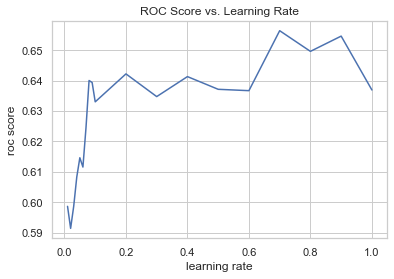

In [8]:
# make a list of all roc scores for each model
for modelXGB in modelXGB_list:
    y_pred = modelXGB.predict(X_valid)
    # compute the roc score
    auc_list.append(roc_auc_score(y_valid_t1, y_pred))
    
# plot the line graph of the distribution of roc score
sns.set_theme(style="whitegrid")
sns.lineplot(x=learning_rate_list, y=auc_list)
plt.xlabel('learning rate')
plt.ylabel('roc score')
plt.title('ROC Score vs. Learning Rate')
plt.show()

In [17]:
# hence, model with learning rate of 0.07 is performance the best
y_pred_test = modelXGB_007.predict(X_test)
df_test = pd.DataFrame(y_pred_test)

# save the prediction
df_test.to_csv(os.path.join(path_y_t1, 'Y_test.csv'), index=False)